In [ ]:

# necessary packages
import tensorflow as tf
import pickle

import pandas as pd 
import numpy as np

import os
import sys

import warnings
warnings.filterwarnings('ignore')

import os
import skimage
import matplotlib.pyplot as plt  
import cv2


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np

def load_images_from_folder(folder):
    images = []
    image_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))

        if img is not None:
            img=cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
            images.append(img)
            filename = filename.replace('.jpg', '')
            image_name.append(filename)
    return images, image_name

images_lst, image_names = load_images_from_folder('/content/drive/MyDrive/project/all_samples /images/gray_img_train')

In [ ]:
np.array(images_lst).shape

(3225, 224, 224, 3)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/project/all_samples /df_text')
train_data

,clean_title,id,labels
0,rex roar,b4afd746dd,0
1,other discussions,ff802e9957,1
2,keeping an eye on the class,8aa68d331f,0
3,fixed it for you,a1e3054072,0
4,til of hitchbot a robot designed to turn its b...,55bba1a2ba,0
...,...,...,...
59349,the german army sharing technologies with ital...,d1cd731d4a,0
59350,hero dog award goes to a cat for saving boy fr...,a34aea68c7,1
59351,best costume ever,6d7d1d7f93,0
59352,malik wolfe monarchal,790c7d2522,0


In [ ]:
import pandas as pd

df_images = pd.DataFrame ({ 'images': images_lst, 'id': image_names}, columns = ['images','id'])

from operator import index

df_images = pd.merge(df_images, train_data , on='id')

In [ ]:
df_images = df_images[['images','labels']]
df_images

,images,labels
0,"[[[205, 205, 205], [217, 217, 217], [214, 214,...",1
1,"[[[113, 113, 113], [119, 119, 119], [126, 126,...",0
2,"[[[80, 80, 80], [81, 81, 81], [81, 81, 81], [8...",0
3,"[[[70, 70, 70], [70, 70, 70], [71, 71, 71], [7...",0
4,"[[[113, 113, 113], [113, 113, 113], [114, 114,...",0
...,...,...
3220,"[[[134, 134, 134], [121, 121, 121], [114, 114,...",1
3221,"[[[30, 30, 30], [26, 26, 26], [27, 27, 27], [2...",0
3222,"[[[89, 89, 89], [84, 84, 84], [67, 67, 67], [5...",0
3223,"[[[158, 158, 158], [151, 151, 151], [142, 142,...",0


Gray scale - 

Grayscale refers to a situation in which each pixel in a digital image solely contains information about the light's intensity. Usually, just the range from deepest black to brightest white is visible in such photos. In other words, the only colours present in the image are black, white, and grey, the latter of which includes several shades.

It facilitates the simplification of algorithms and also removes the difficulties associated with computational requirements. For individuals who are unfamiliar with image processing, it allows for simpler learning.

In [ ]:
def gray_scale(img):
  gray = img[:,:,0]
  return gray

# Using lambda function
df_images['images'] = df_images['images'].apply(lambda row : gray_scale(row))
print(df_images.head(5))

                                              images  labels
0  [[205, 217, 214, 219, 220, 217, 209, 212, 203,...       1
1  [[113, 119, 126, 133, 137, 142, 144, 143, 137,...       0
2  [[80, 81, 81, 81, 82, 82, 81, 81, 81, 81, 81, ...       0
3  [[70, 70, 71, 71, 72, 72, 72, 72, 72, 72, 72, ...       0
4  [[113, 113, 114, 114, 115, 115, 114, 114, 114,...       0


In [ ]:
from sklearn.utils import shuffle
def reshapes(z):
    nsamples, nx, ny = z.shape
    z = z.reshape((nsamples,nx*ny))
    return z
    
def datapartition(dataset):
    #Split data into a test and training set
    X = np.array(dataset['images'].tolist())
    y = np.array(dataset['labels'])
    
    #scaling the features
    X = X/255.0    
    X = reshapes(X)
    
    # test is now 20% of the initial data set
    # train is now 80% of the initial data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=9)
  
    print("Train data size: ", X_train.shape, y_train.shape)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = datapartition(df_images)

Train data size:  (2580, 50176) (2580,)


In [ ]:
# validation metrics and calculating accuracy,precision,recall, F1-score from confusion matrix

from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve
import seaborn as sns

data={"metrics":["accuracy","precision","recall","f1score","mean_absolute_error","mean_squared_error"]}
metrics_df = pd.DataFrame(data,columns=["metrics"])

def metricsdf(X_test,y_test,model,name): 
    
    score=[]
    
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,predictions).reshape(-1)
    print('\nOutcome values tp, fn, fp, tn : \n', tp, fn, fp, tn)
    
    accuracy = (tp+tn)/(tn+tp+fp+fn)
    print("\nAccuracy = ",round(accuracy,2))

    precision = (tp)/(tp+fp)
    print("precision = ",precision)
    
    recall = (tp)/(tp+fn)
    print("recall = ",recall)
    
    f1score = 2*((precision*recall)/(precision+recall))
    print("f1score = ",f1score)
    
    mae_dt = metrics.mean_absolute_error(y_test, predictions)
    mse_dt = metrics.mean_squared_error(y_test, predictions)
    
    print("\nmean_absolute_error = ",mae_dt)
    print("mean_squared_error = ",mse_dt)
    
    score.extend([accuracy,precision,recall,f1score,mae_dt,mse_dt])
    metrics_df[name] = score
    

Receiver Operating Characteristic (ROC) -

An efficient way to assess the effectiveness of diagnostic tests is to use the receiver operating characteristic (ROC) curve, which is defined as a plot of test sensitivity as the y coordinate vs its 1-specificity or false positive rate (FPR) as the x coordinate.

In [ ]:

from sklearn import metrics

def ROCurvedf(X_test_dt_raw, y_test_dt_raw,classifier_raw):
    # Plot ROC curve for raw data input
    print("Raw data input ROC Curve")

    fig, (ax) = plt.subplots(figsize = (5,5))
    probs = classifier_raw.predict_proba(X_test_dt_raw)
    preds = probs[:,1]
    fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_dt_raw, preds)
    roc_aucxgb = metrics.auc(fprxgb, tprxgb)
    ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic',fontsize=10)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer

# Importing Logestic regression from Linear model
from sklearn.linear_model import LogisticRegression

data={"Kfold":["Cv-1","Cv-2","Cv-3","Cv-4","Cv-5"]}
table_acc=pd.DataFrame(data,columns=["Kfold"])

cv=RepeatedKFold(n_splits=5,n_repeats=1,random_state=1)


classifiers = [ 
    LogisticRegression(max_iter = 1000,penalty='l2',tol=0.001, solver='liblinear',class_weight="balanced",random_state=12)
    ]

def main(X_train,y,model):
    
    for clf in classifiers:
        name = (clf.__class__.__name__) + (model) 
        print("\nModel classifier = ",name)
        print('\n****Results****')
        clfN=cross_val_score(clf, X_train, y, cv=cv)
        table_acc[name]=clfN
        print("\nTen-fold cross validation score\n\n",clfN)
        acc=clfN.mean()
        print("\nMean Accuracy - ",acc) 
        print("\n------------------------------------------------------------------------------------------\n")



# Binary classification
Basically,It is classification of the two groups into thier respectives on basis of classification rule.

Here, I'm using logistic regression(solver = "liblinear") as my model classifier for the data samples.

K-fold cross validation

A single k-fold cross-validation run may produce a noisy estimate of model performance. Different data splits may produce very different results. Simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs is all that is required. This average result will be a more accurate estimate.

Here, I used 5- fold cross validation which is more reasonable with small datasets. Then created a dataframe for the all cross-validation accracies for each fold and thier mean , standard deviation.

In [ ]:

from sklearn.model_selection import train_test_split

def testdf(X_train,y_train,X_test,y_test,model):
    
    for clf in classifiers:
        name = (clf.__class__.__name__) + (model) 
        print("\n\nModel classifier =  ",name)
        
        #print("\nSample image\n",randomsample(X_test,y_test))
        print('\n****Results****\n')
        clf_fit = clf.fit(X_train, y_train)
        
        print("\nClassification and metrics based on test data-\n")
        metricsdf(X_test,y_test,clf_fit,name)
        print("\n------------------------------------------------------------------------------\n\n")
        
        ROCurvedf(X_test,y_test,clf_fit)  

In [ ]:
main(X_train,y_train," - lr")



Model classifier =  LogisticRegressionLogestic regression

****Results****

Ten-fold cross validation score

 [0.59496124 0.6124031  0.58139535 0.57945736 0.59108527]

Mean Accuracy -  0.5918604651162791

------------------------------------------------------------------------------------------



In [ ]:
Cv_scores=table_acc.copy()
Cv_scores.loc['mean'] = Cv_scores.mean()
Cv_scores.loc['stdev'] = Cv_scores.std()
Cv_scores=Cv_scores.round(decimals=4)
Cv_scores

,Kfold,LogisticRegressionLogestic regression
0,Cv-1,0.5950
1,Cv-2,0.6124
2,Cv-3,0.5814
3,Cv-4,0.5795
4,Cv-5,0.5911
mean,NaN,0.5919
stdev,NaN,0.0118




Model classifier =   LogisticRegression- lr

****Results****


Classification and metrics based on test data-

[[339 144]
 [116  46]]

Outcome values tp, fn, fp, tn : 
 339 144 116 46

Accuracy =  0.6
precision =  0.7450549450549451
recall =  0.7018633540372671
f1score =  0.722814498933902

mean_absolute_error =  0.40310077519379844
mean_squared_error =  0.40310077519379844

------------------------------------------------------------------------------


Raw data input ROC Curve


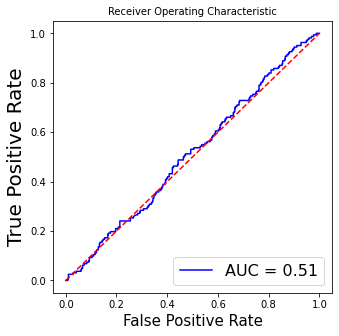

In [ ]:
testdf(X_train,y_train,X_test,y_test,"- lr")

# Sampling data - Base model


In [ ]:
#OVER-SAMPLING using SMOTE.

from imblearn.over_sampling import SMOTE
from collections import Counter

def oversampling(X, y):
    ros = SMOTE(random_state=42)
    X, y = ros.fit_resample(X, y)
    
    print(Counter(y).items())
    return X, y 

def sampling(X_train, y_train):
  # sampling data
  X_train, y_train = oversampling(X_train, y_train)
    
  print('\nResample dataset shape - ', Counter(y_train))
    
  X_train, y_train = shuffle(X_train, y_train)

  return X_train, y_train

In [ ]:
X_train, y_train = sampling(X_train, y_train)

dict_items([(0, 1933), (1, 1933)])

Resample dataset shape -  Counter({0: 1933, 1: 1933})


In [ ]:
main(X_train,y_train," - sampling lr")


Model classifier =  LogisticRegression - sampling lr

****Results****

Ten-fold cross validation score

 [0.8126615  0.79689521 0.80853816 0.81112549 0.7774903 ]

Mean Accuracy -  0.8013421315656641

------------------------------------------------------------------------------------------



In [ ]:
Cv_scores=table_acc.copy()
Cv_scores.loc['mean'] = Cv_scores.mean()
Cv_scores.loc['stdev'] = Cv_scores.std()
Cv_scores=Cv_scores.round(decimals=4)
Cv_scores

,Kfold,LogisticRegressionLogestic regression,LogisticRegression - sampling lr
0,Cv-1,0.5950,0.8127
1,Cv-2,0.6124,0.7969
2,Cv-3,0.5814,0.8085
3,Cv-4,0.5795,0.8111
4,Cv-5,0.5911,0.7775
mean,NaN,0.5919,0.8013
stdev,NaN,0.0118,0.0131




Model classifier =   LogisticRegression- sampling lr

****Results****


Classification and metrics based on test data-

[[341 142]
 [113  49]]

Outcome values tp, fn, fp, tn : 
 341 142 113 49

Accuracy =  0.6
precision =  0.751101321585903
recall =  0.7060041407867494
f1score =  0.7278548559231589

mean_absolute_error =  0.3953488372093023
mean_squared_error =  0.3953488372093023

------------------------------------------------------------------------------


Raw data input ROC Curve


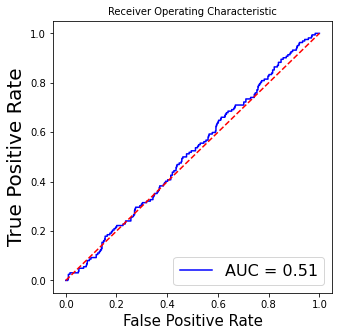

In [ ]:
testdf(X_train,y_train,X_test,y_test,"- sampling lr")

#Deep neural network model using CNN layers

Feature extraction process of CNN

Dense layers learn global patterns in their input feature space, whereas convolution layers learn local patterns by narrow windows of feature map. This is the key distinction between a densely linked layer and a convolution layer.

The three basic operations that comprise CNN's feature extraction are as follows.

Filter: an image for a perticular feature (Convolution)
Detect: feature within the filtered image (ReLU)
Condense: image to enhance the features (Maxpooling)


In [ ]:
import tensorflow as tf

In [ ]:
def datasplit(dataset):
    #Split data into a test and training set
    X = np.array(dataset['images'].tolist())
    y = np.array(dataset['labels'])
    
    #scaling the features
    X = X/255.0
    
    # test is now 20% of the initial data set
    # train is now 80% of the initial data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=9)
  
    print("Train data size: ", X_train.shape, y_train.shape)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = datasplit(df_images)

Train data size:  (2580, 224, 224, 3) (2580,)


CNN2D layer arguments:

tf.keras.layers.Conv2D( filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs )
Integer filters with dimensional output spaces (i.e. the number of output filters in the convolution) 

filters - Integer filters with dimensional output spaces (i.e. the number of output filters in the convolution) 

kernel size - The height and breadth of the 2D convolution window are specified by the integer kernel size, which can also be a tuple or list of two numbers. To express the same value for each spatial dimension, a single integer may be used. 

strides - An integer or tuple/list of two numbers that specifies the height and width of the convolution's strides. To express the same value for each spatial dimension, a single integer may be used. Any stride value less than 1 is incompatible with any dilation rate value less than 1.

padding - either "valid" or "the same" (case-insensitive). Valid indicates there is no padding. "Same" causes zeros to be evenly spaced to the left and right or up and down of the input. When strides=1 and padding="same," the output is the same size as the input. 

activation - Use the activation function to activate. No activation is applied if you don't provide anything.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (224,224,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))  # we can also write this as activation = 'softmax'
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# NN has 2 hidden layers   


In [ ]:
def train_model(x_train,y_train,x_test,y_test,model):
    '''
    function which trains the model and returns the number of epochs as welll as accuracy 
    '''
    class Call_back(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy')>0.99):
                print('Desired Accuracy Reached.Stopping the Training.')
                self.model.stop_training = True
    
    callback = Call_back()
                

    
    # model fitting
    history = model.fit(x_train,y_train,epochs =10,validation_split = 0.2,callbacks = [callback])

    metrics = model.evaluate(x_test,y_test)

    return metrics, history

In [ ]:
metrics, history = train_model(X_train,y_train,X_test,y_test,model)

Epoch 1/10
65/65 [==============================] - 150s 2s/step - loss: 5.9932 - accuracy: 0.6153 - val_loss: 0.5795 - val_accuracy: 0.7694
Epoch 2/10
65/65 [==============================] - 132s 2s/step - loss: 0.5564 - accuracy: 0.7418 - val_loss: 0.6107 - val_accuracy: 0.7655
Epoch 3/10
65/65 [==============================] - 129s 2s/step - loss: 0.4699 - accuracy: 0.7980 - val_loss: 0.5944 - val_accuracy: 0.7694
Epoch 4/10
65/65 [==============================] - 133s 2s/step - loss: 0.3097 - accuracy: 0.8876 - val_loss: 0.7276 - val_accuracy: 0.7442
Epoch 5/10
65/65 [==============================] - 128s 2s/step - loss: 0.2029 - accuracy: 0.9496 - val_loss: 0.8595 - val_accuracy: 0.7442
Epoch 6/10
65/65 [==============================] - 132s 2s/step - loss: 0.1552 - accuracy: 0.9709 - val_loss: 0.9273 - val_accuracy: 0.7132
Epoch 7/10
65/65 [==============================] - 135s 2s/step - loss: 0.1303 - accuracy: 0.9767 - val_loss: 0.9499 - val_accuracy: 0.7093
Epoch 8/10
65

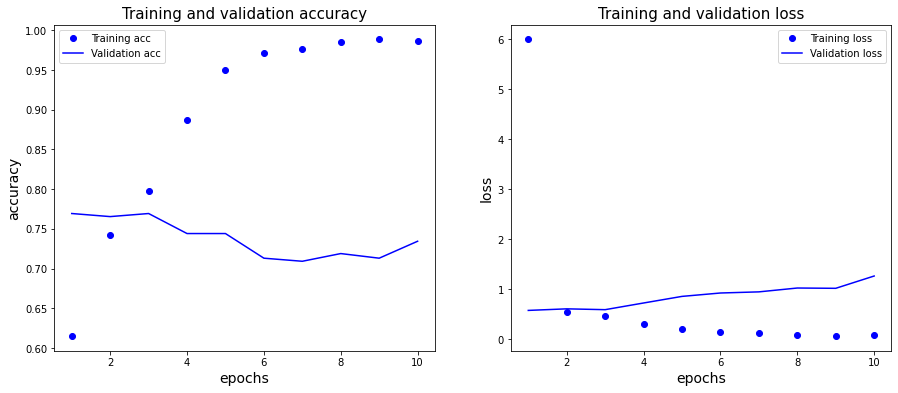

In [ ]:
def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()


# call the function to plot the curves
plot_loss_accuracy(history)

# Transfer Learning - 

Transfer learning is a strategy where we take a model that has been trained for one machine learning task and use it as a springboard for another. This method is utilised in numerous deep learning fields, such as image classification, natural language processing, It is quite valuable to be able to apply a trained model to another task.

Model training using pre-trained convolutional base VGG16

In [ ]:
# next up model using pretrained model vgg16 to improve accuracy to 85-90% and machine visualization
# initializing convolutional base of vgg16

import random
from keras.applications import vgg16

# Pretrained convolutional layers are loaded using the Imagenet weights.
# Include_top is set to False, in order to exclude the model's fully-connected layers.


conv_base = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3)
                 )

conv_base.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Feature extraction strategy -

With this method, we use the architecture of the pre-trained model to create a new dataset from our input photographs. The model's "top portion" won't be imported; just the Convolutional and Pooling layers will be imported (the Fully-Connected layer). Now process the images through the VGG16 convolutional layers to create a Feature Stack comprising the recognised visual features. The three-dimensional feature stack can now easily be flattened into a NumPy array so that it is ready for any modelling you decide to undertake.

In [ ]:
# Extract training feature map from vgg16 conv_base
train_featuremap = conv_base.predict(X_train)
test_featuremap = conv_base.predict(X_test) 

21/21 [==============================] - 349s 16s/step


In [ ]:

# print the shape of output tensors from convolutionla base -vgg16
train_featuremap.shape, test_featuremap.shape


((2580, 7, 7, 512), (645, 7, 7, 512))

In [ ]:
# train the model by adding dense layers on top of extracted features
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model
import keras.callbacks
from keras.callbacks import ModelCheckpoint

model2 = tf.keras.models.Sequential()
model2.add(layers.Flatten(input_shape=(7,7,512)))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(1, activation='softmax'))
model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                250890    
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model with 'RMSprop' optimizer
model2.compile(loss='categorical_crossentropy',
             optimizer= tf.keras.optimizers.RMSprop(learning_rate=2e-5),
             metrics=['accuracy']
             )

# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]


In [ ]:

# fit the model to datr and save the model statistics to result instance
result = model2.fit(train_featuremap, y_train,
                   epochs=30,
                   validation_data=(test_featuremap, y_test),
                   callbacks=callback_list
                   )

# print the final test accuracy and loss
tst_loss, tst_acc = model2.evaluate(test_featuremap, y_test, verbose=0)
print("Test loss and accuracy of model2:", tst_loss, tst_acc)


Epoch 1/30
81/81 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.2512
Epoch 2/30
81/81 [==============================] - 2s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.2512
Epoch 3/30
81/81 [==============================] - 2s 24ms/step - loss: 0.0000e+00 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.2512
Epoch 4/30
81/81 [==============================] - 2s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.2512
Epoch 5/30
81/81 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.2512
Epoch 6/30
81/81 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.2512
Epoch 6: early stopping
Test loss and accuracy of model2: 0.0 0.2511627972126007


# VGG19 CNN
In order to improve upon the baseline CNN, I use VGG19, which is an advanced network with pretrained layers and a better understanding of what defines an image in terms of shape, color, and structure. VGG19 is very deep and has been trained on millions of diverse images with complex classification tasks.

VGG19 consists of 19 layers:

16 convolution layers
5 MaxPool layers
1 SoftMax layer
3 fully connected layers
I extract the general structure of VGG19, freeze its initial layers and append a small dense network to it.

In [ ]:
# load the model
from keras.applications.vgg19 import VGG19


# Build VGG16 structure
cnn_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
print('VGG19 Loaded')
print(cnn_base.summary())

VGG19 Loaded
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)

Model VGG - 2 Dense

In [ ]:
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


reshape_y = 7 * 7 * 512

nb_train_samples = 2580 
nb_test_samples = 645 

# Shape data
reshape_y = 7 * 7 * 512
train_features = np.reshape(train_featuremap, (nb_train_samples, reshape_y))
test_features = np.reshape(test_featuremap, (nb_test_samples, reshape_y))

# Build classifier on top of  VGG19
model1 = Sequential()

# Add dense layers on top of VGG19 
# 1
model1.add(Dense(256, activation='relu', input_dim=reshape_y))
# 2
model1.add(Dense(1, activation='sigmoid'))

# Compile
model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model1.fit(train_features, y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(test_features, y_test))

Epoch 1/20
162/162 [==============================] - 18s 98ms/step - loss: 0.6248 - acc: 0.7209 - val_loss: 0.5679 - val_acc: 0.7442
Epoch 2/20
162/162 [==============================] - 16s 101ms/step - loss: 0.5427 - acc: 0.7500 - val_loss: 1.0069 - val_acc: 0.3116
Epoch 3/20
162/162 [==============================] - 15s 94ms/step - loss: 0.4983 - acc: 0.7554 - val_loss: 0.7113 - val_acc: 0.5085
Epoch 4/20
162/162 [==============================] - 16s 97ms/step - loss: 0.4413 - acc: 0.7911 - val_loss: 0.6344 - val_acc: 0.7411
Epoch 5/20
162/162 [==============================] - 15s 92ms/step - loss: 0.3911 - acc: 0.8186 - val_loss: 1.4813 - val_acc: 0.2899
Epoch 6/20
162/162 [==============================] - 11s 68ms/step - loss: 0.3576 - acc: 0.8469 - val_loss: 0.9447 - val_acc: 0.7457
Epoch 7/20
162/162 [==============================] - 11s 70ms/step - loss: 0.3035 - acc: 0.8756 - val_loss: 0.6962 - val_acc: 0.7116
Epoch 8/20
162/162 [==============================] - 11s 70m

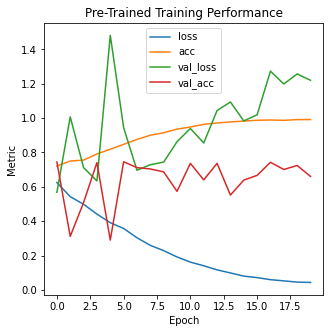

In [ ]:

# Print training history
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title('Pre-Trained Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()


Model VGG - 3 Dense 1 Dropout

In [ ]:
# Deeper VGG19 network
model2 = Sequential()
# 1
model2.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model2.add(Dropout(0.2))
# 3
model2.add(Dense(64, activation='relu'))
# 4
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model2.fit(train_features, y_train,
                    epochs=15,
                    batch_size=124,
                    validation_data=(test_features, y_test))


Epoch 1/15
21/21 [==============================] - 4s 138ms/step - loss: 0.5959 - acc: 0.7349 - val_loss: 0.5671 - val_acc: 0.7488
Epoch 2/15
21/21 [==============================] - 3s 131ms/step - loss: 0.5578 - acc: 0.7492 - val_loss: 0.5785 - val_acc: 0.7488
Epoch 3/15
21/21 [==============================] - 3s 133ms/step - loss: 0.5487 - acc: 0.7484 - val_loss: 0.5559 - val_acc: 0.7488
Epoch 4/15
21/21 [==============================] - 3s 135ms/step - loss: 0.5358 - acc: 0.7430 - val_loss: 0.5540 - val_acc: 0.7488
Epoch 5/15
21/21 [==============================] - 3s 132ms/step - loss: 0.5122 - acc: 0.7585 - val_loss: 0.6011 - val_acc: 0.7473
Epoch 6/15
21/21 [==============================] - 3s 132ms/step - loss: 0.5007 - acc: 0.7636 - val_loss: 0.5841 - val_acc: 0.7473
Epoch 7/15
21/21 [==============================] - 3s 132ms/step - loss: 0.5003 - acc: 0.7539 - val_loss: 0.5740 - val_acc: 0.7473
Epoch 8/15
21/21 [==============================] - 4s 185ms/step - loss: 0.

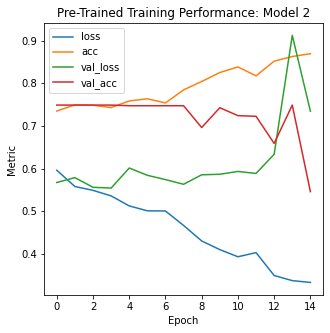

In [ ]:
count = 2

pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

Model VGG - 2 Dense 1 Dropout (lr=1e-2)

In [ ]:
# Reduce learning rate to 1e-2
model3 = Sequential()
# 1
model3.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model3.add(Dropout(0.2))
# 3
model3.add(Dense(64, activation='relu'))
# 4
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model3.fit(train_features, y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(test_features, y_test))


Epoch 1/20
162/162 [==============================] - 12s 71ms/step - loss: 5.1960 - acc: 0.7136 - val_loss: 1.5160 - val_acc: 0.7488
Epoch 2/20
162/162 [==============================] - 12s 72ms/step - loss: 0.7226 - acc: 0.7391 - val_loss: 0.5696 - val_acc: 0.7488
Epoch 3/20
162/162 [==============================] - 11s 70ms/step - loss: 0.6345 - acc: 0.7446 - val_loss: 0.5647 - val_acc: 0.7488
Epoch 4/20
162/162 [==============================] - 11s 70ms/step - loss: 0.6250 - acc: 0.7477 - val_loss: 0.5645 - val_acc: 0.7488
Epoch 5/20
162/162 [==============================] - 11s 69ms/step - loss: 0.5812 - acc: 0.7488 - val_loss: 1.1041 - val_acc: 0.7488
Epoch 6/20
162/162 [==============================] - 11s 66ms/step - loss: 0.6117 - acc: 0.7488 - val_loss: 0.5638 - val_acc: 0.7488
Epoch 7/20
162/162 [==============================] - 11s 66ms/step - loss: 0.5918 - acc: 0.7442 - val_loss: 0.5641 - val_acc: 0.7488
Epoch 8/20
162/162 [==============================] - 11s 67ms

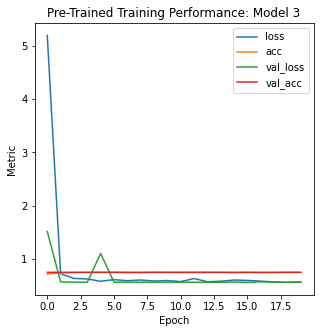

In [ ]:

pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

Model VGG - Adam

In [ ]:
# Try adam optimizer
model4 = Sequential()
# 1
model4.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model4.add(Dropout(0.2))
# 3
model4.add(Dense(64, activation='relu'))
# 4
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model4.fit(train_features, y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(test_features, y_test))

Epoch 1/20
162/162 [==============================] - 7s 42ms/step - loss: 0.7346 - acc: 0.7035 - val_loss: 0.5702 - val_acc: 0.7488
Epoch 2/20
162/162 [==============================] - 6s 40ms/step - loss: 0.5688 - acc: 0.7380 - val_loss: 0.6076 - val_acc: 0.7488
Epoch 3/20
162/162 [==============================] - 7s 41ms/step - loss: 0.5392 - acc: 0.7450 - val_loss: 0.6853 - val_acc: 0.7488
Epoch 4/20
162/162 [==============================] - 7s 41ms/step - loss: 0.5066 - acc: 0.7585 - val_loss: 0.5602 - val_acc: 0.7473
Epoch 5/20
162/162 [==============================] - 6s 39ms/step - loss: 0.4656 - acc: 0.7764 - val_loss: 0.7003 - val_acc: 0.7488
Epoch 6/20
162/162 [==============================] - 6s 40ms/step - loss: 0.4098 - acc: 0.8105 - val_loss: 0.6455 - val_acc: 0.7488
Epoch 7/20
162/162 [==============================] - 6s 39ms/step - loss: 0.3707 - acc: 0.8248 - val_loss: 0.9044 - val_acc: 0.7411
Epoch 8/20
162/162 [==============================] - 6s 39ms/step - 

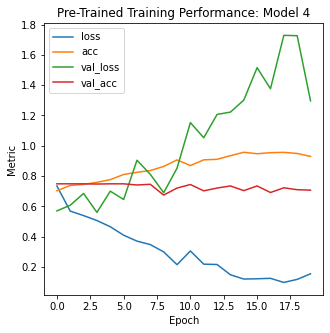

In [ ]:
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

In [ ]:
# Shallower network
model5 = Sequential()
# 1
model5.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model5.add(Dropout(0.2))
# 3
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer=optimizers.RMSprop(lr=5e-6),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model5.fit(train_features, y_train,
                    epochs=25,
                    batch_size=16,
                    validation_data=(test_features, y_test))


Epoch 1/25
162/162 [==============================] - 13s 70ms/step - loss: 0.5858 - acc: 0.7345 - val_loss: 0.5686 - val_acc: 0.7488
Epoch 2/25
162/162 [==============================] - 11s 66ms/step - loss: 0.5545 - acc: 0.7496 - val_loss: 0.5653 - val_acc: 0.7473
Epoch 3/25
162/162 [==============================] - 11s 67ms/step - loss: 0.5418 - acc: 0.7508 - val_loss: 0.5708 - val_acc: 0.7473
Epoch 4/25
162/162 [==============================] - 11s 66ms/step - loss: 0.5264 - acc: 0.7508 - val_loss: 0.5658 - val_acc: 0.7411
Epoch 5/25
162/162 [==============================] - 11s 66ms/step - loss: 0.5119 - acc: 0.7570 - val_loss: 0.5721 - val_acc: 0.7318
Epoch 6/25
162/162 [==============================] - 11s 66ms/step - loss: 0.5007 - acc: 0.7612 - val_loss: 0.5684 - val_acc: 0.7426
Epoch 7/25
162/162 [==============================] - 11s 66ms/step - loss: 0.4885 - acc: 0.7620 - val_loss: 0.5657 - val_acc: 0.7395
Epoch 8/25
162/162 [==============================] - 11s 66ms

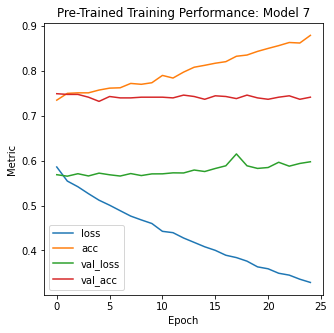

In [ ]:
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

21/21 [==============================] - 0s 18ms/step


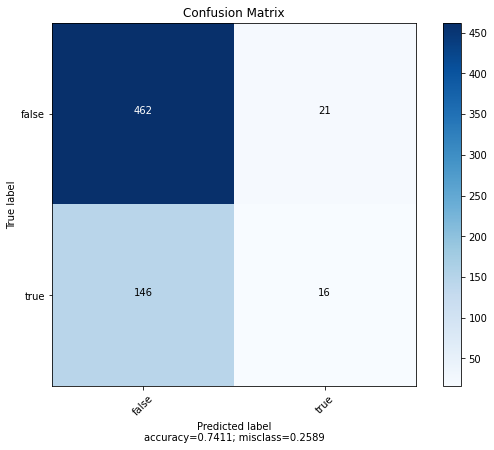

In [ ]:
# Plot confusion matrix
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=False):
   
    
    # Accuracy score
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    # Colormap gradient
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Show classification classes
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    # Plot raw numbers or proportions
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
   
    # Text settings
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Predict probabilities
y_pred = model5.predict(test_features)
y_score = np.array([int(x > 0.5) for x in y_pred])
cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm, ['false', 'true'])
